# Social Networks and Belief Distributions

- this notebook undertakes various comparative statistics analysis for the social-network-based learning in _Learning from Friends in a Pandemic_ by Christos Makridis and Tao Wang. These results are not included in the paper draft.
- agents partially update from private signals and partially adopt the naive learning, in which the posterior beliefs of each one is a weighted average of beliefs of connected nodes in the previous period with the weights being proportional to its connectedness with other nodes.



## Learning from the social network 


### Social network and listening matrix 

There are N nodes in the network, each of which is indexed as $i=1,2...N$. We use $l_{i,j}$ to denote the number of linkages between a pair of node $i$ and $j$.  Any connected nodes have $l_{i,j}=l_{j,i}>0$. The size of $l_{i,j}$ varies depending on the thickness of the ties between two nodes. Each node has within-node non-zero connectedness $l_{i,i} = l_i$ to reflect intraregion connections.  We can define the following correspondingly. 

The listening matrix $W$ is defined so that the $i,j-th$ entry takes the following value 

\begin{equation}
w_{i,j} = \frac{l_{i,j}}{\sum^N_{k=1} l_{i,k}}
\end{equation}


Weight matrix $W$ has the following properties. 

- each row of the matrix sums up to one because it reflects the total weights $i$ assigns to all nodes in the network.
- the diagonal of the matrix is non zero because the individual node assigns non-zero weight to itself.


We can also define the degree of each node as the row sum of the weight matrix $W$. It is a measure of the node's influence on other nodes in the network

\begin{equation}
d_j = \sum^N_{k=1}w_{k,j}
\end{equation}

These sequence of the degrees ${d_j}_{\{j\in \mathbb{N}\}}$ and its distribution is one of the key characteristics of the network structure that may potentially influence the distribution of beliefs. For instance, higher dispersion of the ${d_j}_{\{j\in \mathbb{N}\}}$ implies that the influence of individual node has on others are more asymmetric.  

### Belief formation

Each node at time $t$ is in trying to guess the unobservable aggregate stochastic state, $\tilde \psi_{i,t}$. Assuming the weight $\lambda$ is given to social learning. The agent's belief is equal to a weighted average of the privately updated belief via Kalman filtering and the posterior via social communication with connected nodes. Stacking individual beliefs into a vector $\tilde \psi_t$, we have a convenient transition formula for the distribution of the beliefs each period.  


\begin{equation}
\begin{split}
& \tilde \psi_t = M_t\tilde \psi_{t-1} + (1-\lambda)diag(H-\kappa_t)s_t  \\
& M_t = (1-\lambda)diag(\kappa_t) +\lambda W \\
& \kappa_{i,t} = \frac{\sigma^2_\eta}{\Sigma_{i,t-1}+\sigma^2_\theta + \sigma^2_\eta} \\
& \Sigma_{i,t} = \kappa_{i,t} (\Sigma_{i,t-1}+\sigma^2_\theta)
\end{split}
\end{equation}


- $M_t$ consists of the efficiently assigned weights in Kalman filtering and the constant weights from social learning;
- $H$ is a vector of ones.
- $s_t$ is a vector sized $N$ stacking all surprises at each period, i.e. the change in local infections in each node.

The formula nests a few special cases:
- $\lambda = 0$: no social learning and agents rationally update their beliefs using local information;
- $\lambda =1$: private information is ignored at all and agents only repeatedly communicate the prior beliefs. 

### Analysis of the Social Network from Data 

- we primarily focus on two distributions of the influence matrix. 
   - the distribution of the influence weights, i.e. that of $w_{i,j}$ 
   - the distribution of degree, i.e., $d_j$. 
   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy.linalg as la

In [2]:
## plot configs 

fontsize = 14
legendsize = 12

In [4]:
## import sci data

sci = pd.read_stata('../data/facebook/county_county_data.dta')
sci16 = pd.read_csv('../data/facebook/scaledSCI2016.csv')

In [5]:
print('# of the counties in SCI data for 2016 is '+str(int(np.sqrt(sci16.shape[0]))))     
print('# of the counties in SCI data for 2019 is '+str(int(np.sqrt(sci.shape[0]))))

# of the counties in SCI data for 2016 is 3134
# of the counties in SCI data for 2019 is 3141


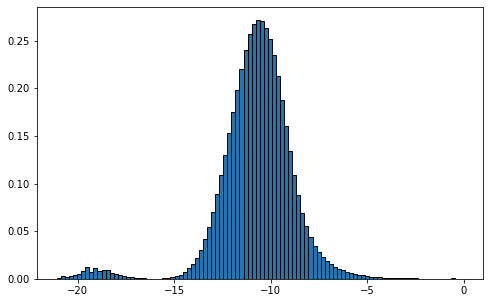

In [6]:
## Distribution of weights

fig,ax = plt.subplots(figsize =(8,5))
#ax.set_title('Distribution of (logged) indegree of Facebook')
a = ax.hist(np.log(sci['normSCI_all']),
            bins = 100,
            edgecolor = 'black',
            density = True)
fig.savefig('../graph/model/w_hist.jpg')

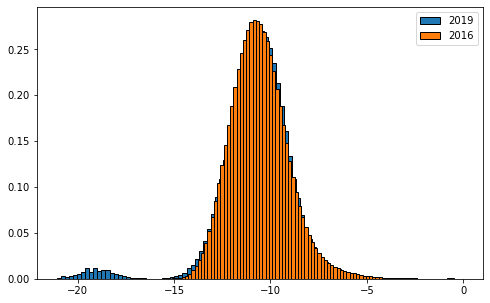

In [19]:
## Distribution of weights

fig,ax = plt.subplots(figsize =(8,5))
#ax.set_title('Distribution of (logged) indegree of Facebook')
a = ax.hist(np.log(sci['normSCI_all']),
            bins = 100,
            edgecolor = 'black',
            density = True,
           label='2019')


## take zero out
sci16_n0 = np.array(sci16['normSCI_all2016'])
sci16_n0 = sci16_n0[sci16_n0!=0]

b = ax.hist(np.log(sci16_n0),
            bins = 100,
            edgecolor = 'black',
            density = True,
           label='2016')

plt.legend(loc=1)
fig.savefig('../graph/model/w_hist_compare.jpg')

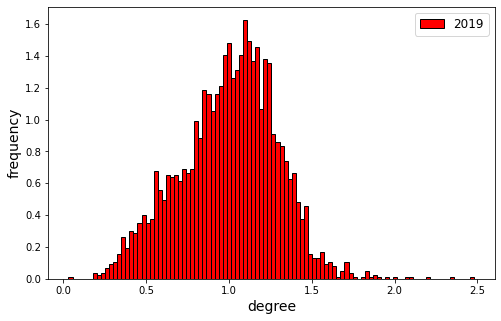

In [8]:
degree = sci.groupby('fr_county')['normSCI_all'].sum()

## outdegree 
fig,ax = plt.subplots(figsize =(8,5))
#ax.set_title('Distribution of outdegree of Facebook')
a = ax.hist(degree,
            bins = 100,
            color ='red',
            edgecolor = 'black',
            density = True,
           label = '2019')
ax.set_xlabel('degree',fontsize= fontsize)
ax.set_ylabel('frequency',fontsize= fontsize)
plt.legend(loc = 1,
           fontsize = legendsize)
fig.savefig('../graph/model/degree_hist.jpg')

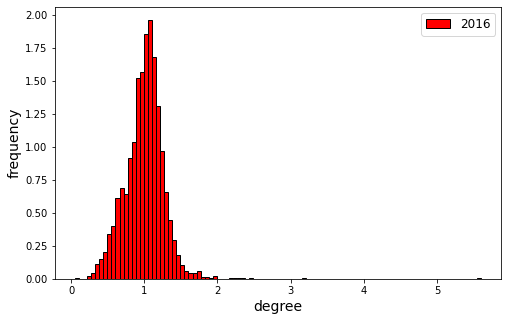

In [9]:
degree16 = sci16.groupby('fr_county')['normSCI_all2016'].sum()

## outdegree 
fig,ax = plt.subplots(figsize =(8,5))
#ax.set_title('Distribution of outdegree of Facebook')
a = ax.hist(degree16,
            bins = 100,
            color ='red',
            edgecolor = 'black',
            density = True,
            label = '2016')
ax.set_xlabel('degree',fontsize= fontsize)
ax.set_ylabel('frequency',fontsize= fontsize)
plt.legend(loc = 1,
           fontsize = legendsize)
fig.savefig('../graph/model/degree_hist2016.jpg')

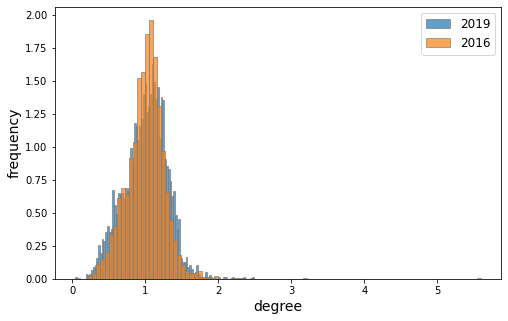

In [10]:
## outdegree 
fig,ax = plt.subplots(figsize =(8,5))
#ax.set_title('Distribution of outdegree of Facebook')
a = ax.hist(degree,
            bins = 100,
            alpha= 0.7,
            edgecolor = 'gray',
            density = True,
            label = '2019')
b = ax.hist(degree16,
            bins = 100,
            alpha= 0.7,
            edgecolor = 'gray',
            density = True,
            label = '2016')
ax.set_xlabel('degree',fontsize= fontsize)
ax.set_ylabel('frequency',fontsize= fontsize)
plt.legend(loc = 1,
           fontsize = legendsize)
fig.savefig('../graph/model/degree_hist_compare.jpg')

## who are those cities ?

In [11]:
# the 10 most ``influential'' counties
np.flip(np.array(degree).argsort())[0:10]

array([1656, 2539, 1632, 2033,   94, 2392, 2677, 1745, 1603,   71])

In [14]:
## compute some summary statics

dg_av = np.mean(degree)
dg_sd_nm = np.sqrt(np.var(degree))/dg_av

dg_av16 = np.mean(degree16)
dg_sd_nm16 = np.sqrt(np.var(degree16))/dg_av

print('average degree in 2019 is '+ str(round(dg_av,3)))
print('normalized standard deviation in 2019 is '+ str(round(dg_sd_nm,3)))

print('average degree in 2016 is '+ str(round(dg_av16,3)))
print('normalized standard deviation in 2016 is '+ str(round(dg_sd_nm16,3)))

average degree in 2019 is 1.0
normalized standard deviation in 2019 is 0.293
average degree in 2016 is 1.0
normalized standard deviation in 2016 is 0.27


In [15]:
## generate the weight matrix 

sci = sci.sort_values(by=['user_county','fr_county'])
sci16 = sci16.sort_values(by=['user_county','fr_county'])

In [16]:
wt_dt = pd.pivot_table(sci,
                       values=['normSCI_all'], 
                       index=['user_county'],
                       columns=['fr_county']
                      )

wt_dt16 = pd.pivot_table(sci16,
                       values=['normSCI_all2016'], 
                       index=['user_county'],
                       columns=['fr_county']
                        )

## influence weight matrix 
W = np.array(wt_dt)
W16 = np.array(wt_dt16)

## save as array 
np.save('SCIWeight', W) ## save the matrix for other use
np.save('SCIWeight16', W16) ## save the matrix for other use

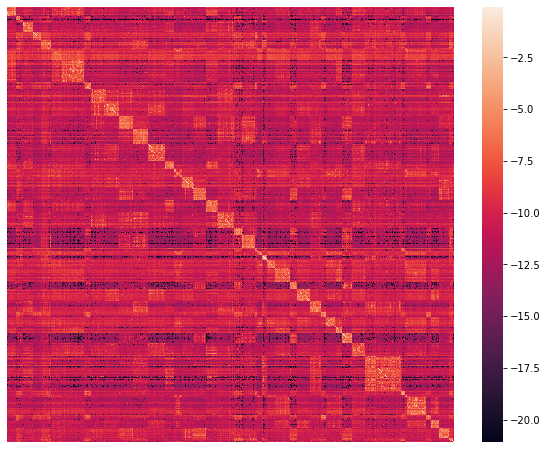

In [18]:
## plot the listening matrix 

fig,ax = plt.subplots(figsize =(10,8))
ax = sns.heatmap(np.log(W),
                 xticklabels=False, 
                 yticklabels=False,
                )
#plt.title('listening matrix (in log)')
fig.savefig(('../graph/model/heatmap.jpg'))

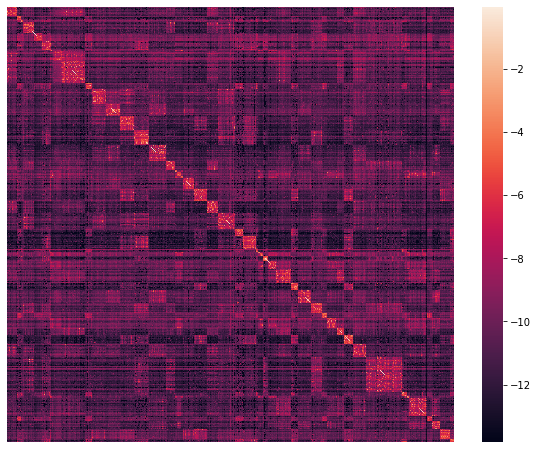

In [20]:
## plot the listening matrix 2016

fig,ax = plt.subplots(figsize =(10,8))
ax = sns.heatmap(np.log(W16+1e-6),
                 xticklabels=False, 
                 yticklabels=False,
                )
#plt.title('listening matrix (in log)')
fig.savefig(('../graph/model/heatmap16.jpg'))

In [21]:
# confirm row and column sum 

print('row sum',W.sum(axis=1)) 

print('column sum',W.sum(axis=0)) 

row sum [1.0000001 1.0000007 1.000001  ... 1.0000001 1.0000001 1.0000005]
column sum [0.7936093  0.54393023 1.1082865  ... 1.0882977  1.196902   1.1114151 ]


### from listening matrix (direct influence) to the influence matrix (cumulative influence) 
- the latter is essentially the eigenvector of the former 


In [22]:
## compute the eigenvector of listening matrix to get the social influence matrix 

from scipy import sparse as sp

# W needs to be 
eigen2019, ss_dstn2019 = sp.linalg.eigs(W.T, 
                                        k = 1, 
                                        which='LM')
sW2019 = ss_dstn2019[:,0].real/np.sum(ss_dstn2019[:,0]).real


eigen2016, ss_dstn2016 = sp.linalg.eigs(W16.T, 
                                        k = 1, 
                                        which='LM')
sW2016 = ss_dstn2016[:,0].real/np.sum(ss_dstn2016[:,0]).real

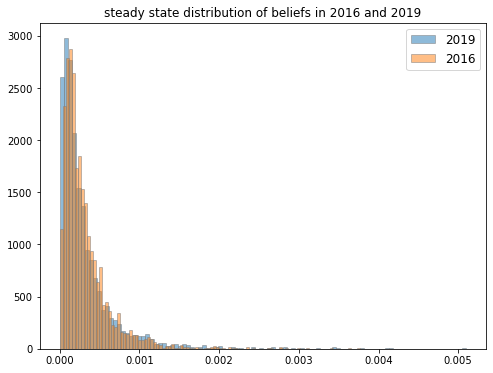

In [23]:
## plot the steady state belief distribution 

fig,ax = plt.subplots(figsize =(8,6))
a = ax.hist(sW2019,
            bins = 100,
            alpha= 0.5,
            edgecolor = 'gray',
            density = True,
            label = '2019')
b = ax.hist(sW2016,
           bins = 100,
            alpha= 0.5,
            edgecolor = 'gray',
            density = True,
            label = '2016')
plt.legend(loc = 1,
           fontsize = legendsize)
plt.title('steady state distribution of beliefs in 2016 and 2019')
fig.savefig(('../graph/model/dist_s_compare.jpg'))

### The social learning and belief distribution/dynamics 

- we write a function that takes the histories of surprises, weight matrix and the prevous belief vector as inputs and produces a posterior bleif vector after the private and social learning.  

In [24]:
def UpdateBeliefNaive(belief_vec,
                      W): ## listening matrix
    return W@belief_vec

In [25]:
def UpdateBeliefGeneral(belief_vec_prior, ## \tilde \psi_t vector
                        s,  ## surprises vector 
                        W,  ## listening matrix 
                        κ, ## kalman gains vector Nx1
                        λ):  ## social_weight, scalor 
    ## turn vectors to matrix
    N = len(belief_vec_prior)
    #belief_vec_prior = belief_vec_prior
    #κ = κ
    #s = s
    H = np.ones(N)
    M = (1-λ)*np.diag(κ)+λ*W
    belief_vec_post = M@belief_vec_prior+ (1-λ)*np.diag(H-κ)@s
    return belief_vec_post.flatten()

In [26]:
## simulate beliefs for the naive rule

N = len(W)
belief_prior_sim = np.random.uniform(size= N)
belief_post_naive_sim = UpdateBeliefNaive(belief_prior_sim,
                                          W)

In [27]:
## simulate beliefs for the general rule

N = len(W)
λ_sim = 0.2
s_sim = belief_prior_sim+np.random.randn(N)*0.1
k_sim = 0.99*np.ones(N)

belief_post_general_sim = UpdateBeliefGeneral(belief_prior_sim,
                                             s_sim,
                                             W,
                                             k_sim,
                                             λ_sim)

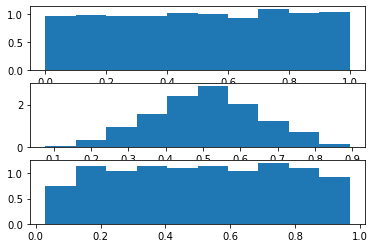

In [28]:
## belief distribution one round of social learning 
## starting from uniformly distributed prior beliefs 
fig, ax = plt.subplots(3,1)
prior = ax[0].hist(belief_prior_sim,
          density=True)
naive=ax[1].hist(belief_post_naive_sim,
                density=True)
general=ax[2].hist(belief_post_general_sim,
                density=True)

In [29]:
## belief distribution one round of social learning 
## starting from binomially distributed prior beliefs 
belief_prior_sim2 = np.random.binomial(1,
                                0.3,
                               size = N)
belief_post_naive_sim2 = UpdateBeliefNaive(belief_prior_sim2,
                                          W)

belief_post_general_sim2 = UpdateBeliefGeneral(belief_prior_sim2,
                                             s_sim,
                                             W,
                                             k_sim,
                                             λ_sim)

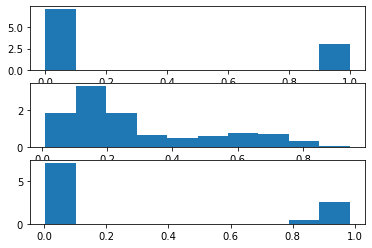

In [30]:
## belief distribution 
fig, ax = plt.subplots(3,1)
prior = ax[0].hist(belief_prior_sim2,
          density=True)
naive=ax[1].hist(belief_post_naive_sim2,
                density=True)
general=ax[2].hist(belief_post_general_sim2,
                density=True)

In [44]:
def SimulateHistories(N,
                      T,
                      σ_eta,
                      σ_theta,
                      σ_init_xi,   ## initial idiosynratic state variance
                      initials_psi): ## initial aggregate state  
    xi_init = np.random.randn(N)*σ_init_xi
    theta_draws = np.random.randn(T)*σ_theta
    ## aggregate shocks 
    psi_draws = np.empty(T)
    psi_draws[0] = initials_psi
    for t in range(T-1):
        psi_draws[t+1] = psi_draws[t]+theta_draws[t+1]
    ## idiosyncratic shocks 
    eta_draws = np.random.randn(N,T)*σ_eta
    
    ## histories 
    xi_draws = np.empty((N,T))
    xi_draws[:,0] = xi_init
    for i in range(N):
        for t in range(T-1):
            xi_draws[i,t+1] = xi_draws[i,t]+eta_draws[i,t+1]+psi_draws[t+1] 
    return psi_draws,xi_draws  ## N x T 

In [45]:
## simulated historical panel 

## parameters 
N_sim = W.shape[0]
T_sim = 100
σ_eta_sim = 0.1
σ_theta_sim = 0.01
σ_xi_init_sim =0.001
ψ_init_sim = 0.0


## invoke the simulation 
psi_sim, xi_sim = SimulateHistories(N_sim,  ## nb of agents
                                    T_sim,   ## time periods 
                                    σ_eta_sim,  ## governs how nosiy private signals 
                                   σ_theta_sim,   ## governs how big aggregate shock is, or the average surprises
                                   σ_xi_init_sim, ## initial dispersion in infection 
                                   ψ_init_sim)    ## initial aggregate state 

Text(0.5, 1.0, 'Simulated histories')

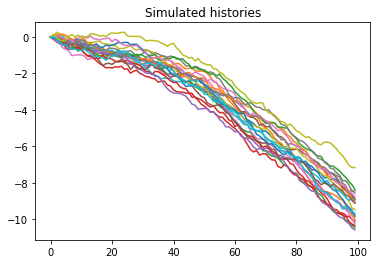

In [46]:
for this in range(20):
    plt.plot(xi_sim[this,:])
    
plt.title("Simulated histories")

In [47]:
## simulated belef histories 

## parameters 
λ_sim = 0.99  ## social weight 
W_sim = W    ## listening matrix  
k_sim = 0.9*np.ones(N)   ## constant kalman gain from private surprises 

N,T = xi_sim.shape

### histories of surprises 
s_sim = xi_sim[:,1:]-xi_sim[:,:-1]

## initial dispersion
sigma_prior = 1

### initialize some priors 
psi_beliefs_sim = np.empty((N,T))
init_priors = sigma_prior*np.random.randn(N)
psi_beliefs_sim[:,0] = init_priors


### update the beliefs 
for t in range(T-1):
    prior_this_time = psi_beliefs_sim[:,t]
    s_sim_this_time = s_sim[:,t]
    psi_beliefs_sim[:,t+1] = UpdateBeliefGeneral(prior_this_time,
                                                 s_sim_this_time,
                                                 W_sim,
                                                 k_sim,
                                                 λ_sim)

Text(0.5, 1.0, 'Average belief and the true realizations')

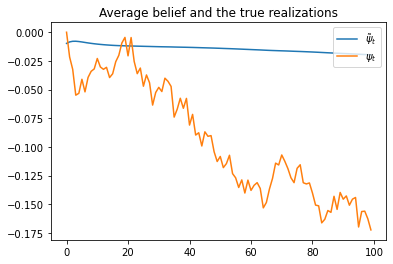

In [48]:
## compare average beliefs and true state 

plt.plot(np.mean(psi_beliefs_sim,axis=0),label=r'$\tilde \psi_{t}$')
plt.plot(psi_sim,label=r'$\psi_t$')
plt.legend(loc=1)
plt.title('Average belief and the true realizations')

Text(0.5, 1.0, 'Belief dispersion')

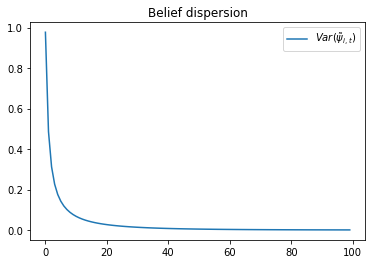

In [49]:
## belief dispersion 

plt.plot(np.std(psi_beliefs_sim,axis=0),label=r'$Var(\tilde \psi_{i,t})$')
plt.legend(loc=1)
plt.title('Belief dispersion')

## A few comparative statistics

In [50]:
## plot configurations 

lw = 4 
figsize=(10,5)

In [51]:
## meta parameters, i.e. common across exercises 

## process parameters 
N_sim = W.shape[0]
T_sim = 50
σ_xi_init_sim =0.001
ψ_init_sim = 0.0


## belief parameters 
W_sim = W    ## listening matrix  

### 1. Different degrees of nosiness of private signals/idiosyncratic volatility 

Text(0.5, 0.98, 'Belief and Noisness of Private Signals')

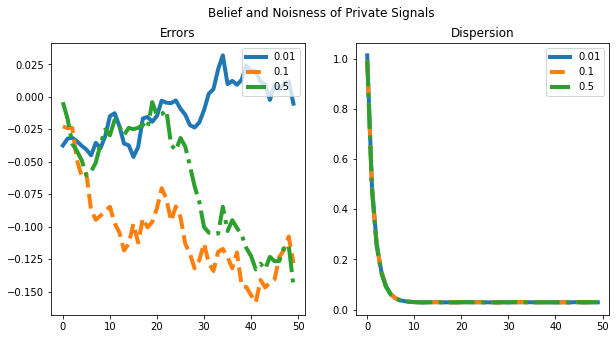

In [52]:
## some fixed parameters 

## process parameters 
σ_eta_sim = 0.1
σ_theta_sim = 0.01

## belief parameters 
λ_sim = 0.5  ## social weight 
k_sim = 0.5*np.ones(N)   ## constant kalman gain from private surprises

## create holders
errors_sim_ls = [] ## this holds the average perception errors 
dispersion_sim_ls = []  ## this holds the dispersion in beliefs 

## loop over this list 

σ_eta_ls = [0.01,0.1,0.5]
lp_ls = ['-','--','-.']

for σ_eta_this in σ_eta_ls:
    this_psi_sim, this_xi_sim = SimulateHistories(N_sim,  ## nb of agents
                                                  T_sim,   ## time periods 
                                                  σ_eta_this,  ## governs how nosiy private signals 
                                                  σ_theta_sim,   ## governs how big aggregate shock is, or the average surprises
                                                  σ_xi_init_sim, ## initial dispersion in infection 
                                                  ψ_init_sim)    ## initial aggregate state 
    N,T = this_xi_sim.shape
    ### histories of surprises 
    this_s_sim = this_xi_sim[:,1:]-this_xi_sim[:,:-1]
    ## initial dispersion
    sigma_prior = 1

    ### initialize some priors 
    psi_beliefs_sim = np.empty((N,T))
    init_priors = sigma_prior*np.random.randn(N)
    psi_beliefs_sim[:,0] = init_priors

    ### update the beliefs 
    for t in range(T-1):
        prior_this_time = psi_beliefs_sim[:,t]
        s_sim_this_time = s_sim[:,t]
        psi_beliefs_sim[:,t+1] = UpdateBeliefGeneral(prior_this_time,
                                                     s_sim_this_time,
                                                     W_sim,
                                                     k_sim,
                                                     λ_sim)
    
    
    ### computes errors and dispersion 
    
    errors_sim_this = np.mean(psi_beliefs_sim,axis=0) - this_psi_sim
    errors_sim_ls.append(errors_sim_this)
    
    dispersion_sim_this = np.std(psi_beliefs_sim,axis=0) 
    dispersion_sim_ls.append(dispersion_sim_this)
    
## plots 
to_plt = [errors_sim_ls,dispersion_sim_ls]
nb_plts = len(to_plt)
titles = ['Errors','Dispersion']

fig,axes = plt.subplots(1,nb_plts,figsize=figsize)
for pltid,plt_ls in enumerate(to_plt):
    for i,σ_eta_this in enumerate(σ_eta_ls):
        axes[pltid].plot(plt_ls[i],
                         lw=lw,
                         linestyle=lp_ls[i],
                         label=str(σ_eta_this))
        axes[pltid].set_title(titles[pltid])
        axes[pltid].legend(loc=1)
fig.suptitle('Belief and Noisness of Private Signals') 

### 2. Different degrees of social weight 

Text(0.5, 0.98, 'Belief and Degree of Social Influence')

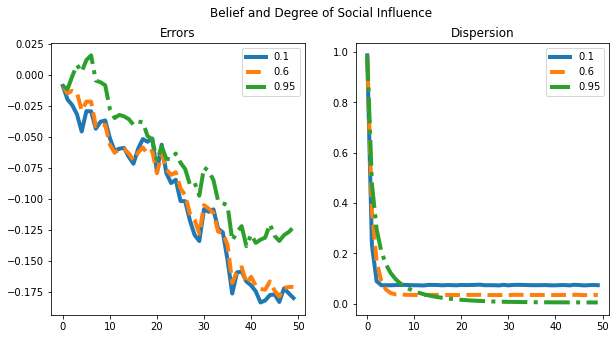

In [53]:
## some fixed parameters 

## process parameters 
σ_eta_sim = 0.1
σ_theta_sim = 0.01

## belief parameters 
#λ_sim = 0.5  ## social weight 
k_sim = 0.2*np.ones(N)   ## constant kalman gain from private surprises

## create holders
errors_sim_ls = [] ## this holds the average perception errors 
dispersion_sim_ls = []  ## this holds the dispersion in beliefs 

## loop over this list 

λ_ls= [0.1,0.6,0.95]
lp_ls = ['-','--','-.']


this_psi_sim, this_xi_sim = SimulateHistories(N_sim,  ## nb of agents
                                              T_sim,   ## time periods
                                              σ_eta_sim,  ## governs how nosiy private signals
                                              σ_theta_sim,   ## governs how big aggregate shock is, or the average surprises
                                              σ_xi_init_sim, ## initial dispersion in infection 
                                              ψ_init_sim)    ## initial aggregate state 
N,T = this_xi_sim.shape
### histories of surprises 
this_s_sim = this_xi_sim[:,1:]-this_xi_sim[:,:-1]
## initial dispersion
sigma_prior = 1

### initialize some priors 
psi_beliefs_sim = np.empty((N,T))
init_priors = sigma_prior*np.random.randn(N)
psi_beliefs_sim[:,0] = init_priors

for λ_this in λ_ls:
    ### update the beliefs 
    for t in range(T-1):
        prior_this_time = psi_beliefs_sim[:,t]
        s_sim_this_time = s_sim[:,t]
        psi_beliefs_sim[:,t+1] = UpdateBeliefGeneral(prior_this_time,
                                                     s_sim_this_time,
                                                     W_sim,
                                                     k_sim,
                                                     λ_this)
    
    
    ### computes errors and dispersion 
    
    errors_sim_this = np.mean(psi_beliefs_sim,axis=0) - this_psi_sim
    errors_sim_ls.append(errors_sim_this)
    
    dispersion_sim_this = np.std(psi_beliefs_sim,axis=0) 
    dispersion_sim_ls.append(dispersion_sim_this)
    
## plots 
to_plt = [errors_sim_ls,dispersion_sim_ls]
nb_plts = len(to_plt)
titles = ['Errors','Dispersion']

fig,axes = plt.subplots(1,nb_plts,figsize=figsize)
for pltid,plt_ls in enumerate(to_plt):
    for i,λ_this in enumerate(λ_ls):
        axes[pltid].plot(plt_ls[i],
                         lw=lw,
                         linestyle=lp_ls[i],
                         label=str(λ_this))
        axes[pltid].set_title(titles[pltid])
        axes[pltid].legend(loc=1)
        
fig.suptitle('Belief and Degree of Social Influence') 

### 3. Different weights to the private prior

Text(0.5, 0.98, 'Belief and Inresponsiveness to Private Surprises')

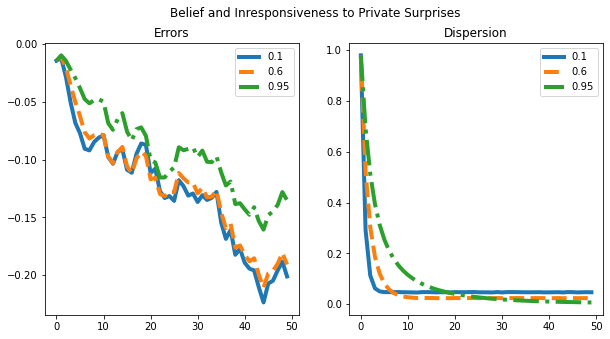

In [54]:
## some fixed parameters 

## process parameters 
σ_eta_sim = 0.1
σ_theta_sim = 0.01

## belief parameters 
λ_sim = 0.5  ## social weight 
#k_sim = 0.9*np.ones(N)   ## constant kalman gain from private surprises

## create holders
errors_sim_ls = [] ## this holds the average perception errors 
dispersion_sim_ls = []  ## this holds the dispersion in beliefs 

## loop over this list 

κ_ls= [0.1,0.6,0.95]
lp_ls = ['-','--','-.']


this_psi_sim, this_xi_sim = SimulateHistories(N_sim,  ## nb of agents
                                              T_sim,   ## time periods
                                              σ_eta_sim,  ## governs how nosiy private signals
                                              σ_theta_sim,   ## governs how big aggregate shock is, or the average surprises
                                              σ_xi_init_sim, ## initial dispersion in infection 
                                              ψ_init_sim)    ## initial aggregate state 
N,T = this_xi_sim.shape
### histories of surprises 
this_s_sim = this_xi_sim[:,1:]-this_xi_sim[:,:-1]
## initial dispersion
sigma_prior = 1

### initialize some priors 
psi_beliefs_sim = np.empty((N,T))
init_priors = sigma_prior*np.random.randn(N)
psi_beliefs_sim[:,0] = init_priors

for κ_this in κ_ls:
    ### update the beliefs 
    for t in range(T-1):
        prior_this_time = psi_beliefs_sim[:,t]
        s_sim_this_time = s_sim[:,t]
        k_vector_this = κ_this*np.ones(N)
        psi_beliefs_sim[:,t+1] = UpdateBeliefGeneral(prior_this_time,
                                                     s_sim_this_time,
                                                     W_sim,
                                                     k_vector_this,
                                                     λ_sim)
    
    
    ### computes errors and dispersion 
    
    errors_sim_this = np.mean(psi_beliefs_sim,axis=0) - this_psi_sim
    errors_sim_ls.append(errors_sim_this)
    
    dispersion_sim_this = np.std(psi_beliefs_sim,axis=0) 
    dispersion_sim_ls.append(dispersion_sim_this)
    
## plots 
to_plt = [errors_sim_ls,dispersion_sim_ls]
nb_plts = len(to_plt)
titles = ['Errors','Dispersion']

fig,axes = plt.subplots(1,nb_plts,figsize=figsize)
for pltid,plt_ls in enumerate(to_plt):
    for i,κ_this in enumerate(κ_ls):
        axes[pltid].plot(plt_ls[i],
                         lw=lw,
                         linestyle=lp_ls[i],
                         label=str(κ_this))
        axes[pltid].set_title(titles[pltid])
        axes[pltid].legend(loc=1)
        
fig.suptitle('Belief and Inresponsiveness to Private Surprises') 

### 4. Different sizes of aggreate shocks 

Text(0.5, 0.98, 'Belief and Size of Aggregate Volatility')

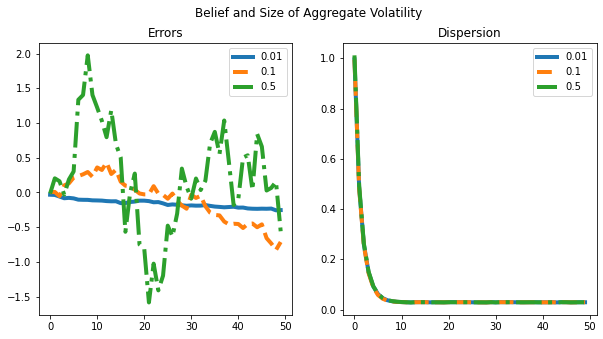

In [55]:
## some fixed parameters 

## process parameters 
σ_eta_sim = 0.1
#σ_theta_sim = 0.01

## belief parameters 
λ_sim = 0.5  ## social weight 
k_sim = 0.5*np.ones(N)   ## constant kalman gain from private surprises

## create holders
errors_sim_ls = [] ## this holds the average perception errors 
dispersion_sim_ls = []  ## this holds the dispersion in beliefs 

## loop over this list 

σ_theta_ls = [0.01,0.1,0.5]
lp_ls = ['-','--','-.']

for σ_theta_this in σ_theta_ls:
    this_psi_sim, this_xi_sim = SimulateHistories(N_sim,  ## nb of agents
                                                  T_sim,   ## time periods 
                                                  σ_eta_sim,  ## governs how nosiy private signals 
                                                  σ_theta_this,   ## governs how big aggregate shock is, or the average surprises
                                                  σ_xi_init_sim, ## initial dispersion in infection 
                                                  ψ_init_sim)    ## initial aggregate state 
    N,T = this_xi_sim.shape
    ### histories of surprises 
    this_s_sim = this_xi_sim[:,1:]-this_xi_sim[:,:-1]
    ## initial dispersion
    sigma_prior = 1

    ### initialize some priors 
    psi_beliefs_sim = np.empty((N,T))
    init_priors = sigma_prior*np.random.randn(N)
    psi_beliefs_sim[:,0] = init_priors

    ### update the beliefs 
    for t in range(T-1):
        prior_this_time = psi_beliefs_sim[:,t]
        s_sim_this_time = s_sim[:,t]
        psi_beliefs_sim[:,t+1] = UpdateBeliefGeneral(prior_this_time,
                                                     s_sim_this_time,
                                                     W_sim,
                                                     k_sim,
                                                     λ_sim)
    
    
    ### computes errors and dispersion 
    
    errors_sim_this = np.mean(psi_beliefs_sim,axis=0) - this_psi_sim
    errors_sim_ls.append(errors_sim_this)
    
    dispersion_sim_this = np.std(psi_beliefs_sim,axis=0) 
    dispersion_sim_ls.append(dispersion_sim_this)
    
## plots 
to_plt = [errors_sim_ls,dispersion_sim_ls]
nb_plts = len(to_plt)
titles = ['Errors','Dispersion']

fig,axes = plt.subplots(1,nb_plts,figsize=figsize)
for pltid,plt_ls in enumerate(to_plt):
    for i,σ_theta_this in enumerate(σ_theta_ls):
        axes[pltid].plot(plt_ls[i],
                         lw=lw,
                         linestyle=lp_ls[i],
                         label=str(σ_theta_this))
        axes[pltid].set_title(titles[pltid])
        axes[pltid].legend(loc=1)
        
fig.suptitle('Belief and Size of Aggregate Volatility') 

### 5. Different degrees of dispersion in initial priors 

Text(0.5, 0.98, 'Belief and Initial Disagreement')

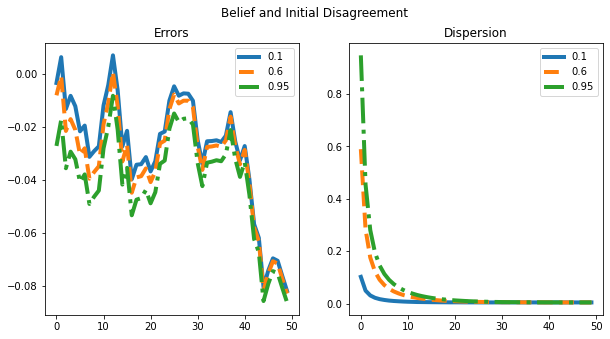

In [56]:
## some fixed parameters 

## process parameters 
σ_eta_sim = 0.1
σ_theta_sim = 0.01

## belief parameters 
λ_sim = 0.5  ## social weight 
k_sim = 0.2*np.ones(N)   ## constant kalman gain from private surprises

## create holders
errors_sim_ls = [] ## this holds the average perception errors 
dispersion_sim_ls = []  ## this holds the dispersion in beliefs 

## loop over this list 

σ_prior_ls= [0.1,0.6,0.95]
lp_ls = ['-','--','-.']


this_psi_sim, this_xi_sim = SimulateHistories(N_sim,  ## nb of agents
                                              T_sim,   ## time periods
                                              σ_eta_sim,  ## governs how nosiy private signals
                                              σ_theta_sim,   ## governs how big aggregate shock is, or the average surprises
                                              σ_xi_init_sim, ## initial dispersion in infection 
                                              ψ_init_sim)    ## initial aggregate state 
N,T = this_xi_sim.shape
### histories of surprises 
this_s_sim = this_xi_sim[:,1:]-this_xi_sim[:,:-1]
## initial dispersion
sigma_prior = 1

### initialize some priors 

for σ_prior_this in σ_prior_ls:
    psi_beliefs_sim = np.empty((N,T))
    init_priors = σ_prior_this*np.random.randn(N)
    psi_beliefs_sim[:,0] = init_priors
    ### update the beliefs 
    for t in range(T-1):
        prior_this_time = psi_beliefs_sim[:,t]
        s_sim_this_time = s_sim[:,t]
        psi_beliefs_sim[:,t+1] = UpdateBeliefGeneral(prior_this_time,
                                                     s_sim_this_time,
                                                     W_sim,
                                                     k_sim,
                                                     λ_this)
    
    
    ### computes errors and dispersion 
    
    errors_sim_this = np.mean(psi_beliefs_sim,axis=0) - this_psi_sim
    errors_sim_ls.append(errors_sim_this)
    
    dispersion_sim_this = np.std(psi_beliefs_sim,axis=0) 
    dispersion_sim_ls.append(dispersion_sim_this)
    
## plots 
to_plt = [errors_sim_ls,dispersion_sim_ls]
nb_plts = len(to_plt)
titles = ['Errors','Dispersion']

fig,axes = plt.subplots(1,nb_plts,figsize=figsize)
for pltid,plt_ls in enumerate(to_plt):
    for i,σ_prior_this in enumerate(σ_prior_ls):
        axes[pltid].plot(plt_ls[i],
                         lw=lw,
                         linestyle=lp_ls[i],
                         label=str(σ_prior_this))
        axes[pltid].set_title(titles[pltid])
        axes[pltid].legend(loc=1)
        
fig.suptitle('Belief and Initial Disagreement') 